In [1]:
import pandas as pd

avengers = pd.read_csv("avengers.csv", encoding="windows-1251")
avengers.head(5)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


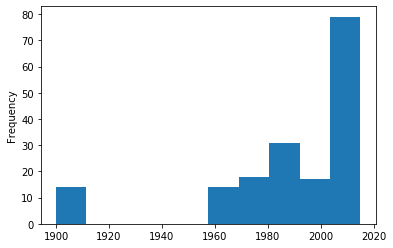

In [2]:
import matplotlib.pyplot as plt
avengers["Year"].plot.hist()
plt.show()

Avengers weren't introduced in the comic series until the 1960's!

This is obviously a mistake in the data. As a result, we should remove all of the Avengers introduced before 1960 from the dataframe

In [3]:
true_avengers = pd.DataFrame()
# keep the Avengers who were introduced after 1960

true_avengers = avengers[avengers["Year"]>= 1960].copy()
# true_avengers

There are five fields (Death1 to Death5), each of which contains a binary value representing whether a superhero experienced that death or not.

In [4]:
def clean_death(series):
    cols = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']

    count = 0
    for c in cols:
        deaths = series[c]
        if deaths == "NO" or pd.isnull(deaths):
            continue
        else:
            count += 1
    return count

             
true_avengers["Deaths"] = true_avengers.apply(clean_death, axis = 1)

In [5]:
# We want to verify that the Years since joining field accurately reflects the Year column.
# using 2015 as the reference year.
# For example, if an Avenger was introduced in the Year 1960, is the Years since joining value for that Avenger 55?

correct_joined_years =\
true_avengers["Years since joining"] == (2015 - true_avengers["Year"])

# Calculate the number of rows where Years since joining is accurate
joined_accuracy_count = true_avengers[correct_joined_years].shape[0]
joined_accuracy_count 

159